# Linear Regression
`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- Simple regression - only one independent variable (e.g. sales)
- Multiple regression - more than one independent variables (e.g. sales, price)

Use when we have **`Linear Data`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

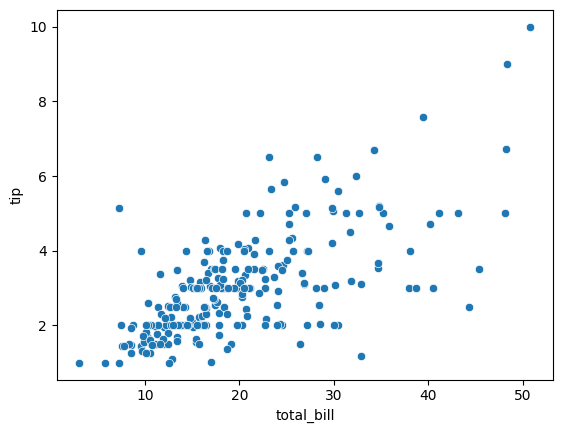

In [5]:
sns.scatterplot(data=df, x='total_bill', y='tip')

In [ ]:
# split the data
X = df[['total_bill']]
y = df['tip']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # here we can use train_size=0.8

In [8]:
# call the Model 
model = LinearRegression()

In [9]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)
# Print the equation
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.9136331850451018
[0.10601777]
y =  0.9136331850451018 + [0.10601777] * X


In [10]:
# prediction
y_pred = model.predict(X_test)

In [15]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.9262964742880564
R2 =  0.43882753011667974
RMSE =  0.9624429719666804


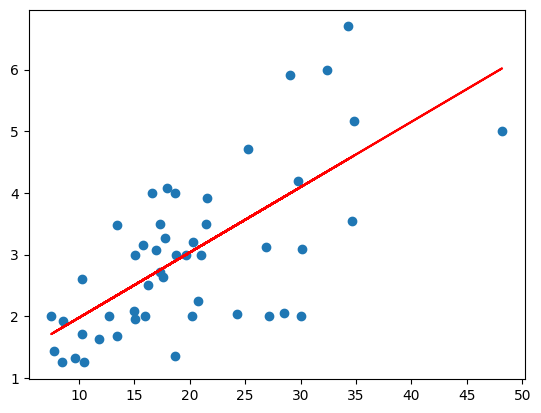

In [19]:
# plot the model
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

### Predictive Models

Method 1

In [25]:
# Make a prediction for a new total bill
new_total_bill = 5
predicted_tip = model.predict([[new_total_bill]])
print(f'For a total bill of ${new_total_bill:.2f}, the predicted tip is ${predicted_tip[0]:.2f}')

For a total bill of $5.00, the predicted tip is $1.44


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Method 2

In [28]:
new_total_bill = 5
predicted_tip = model.predict(np.array([[new_total_bill]]))
predicted_tip

c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.44372206])

Method 3

In [ ]:
# Using np.array([new_total_bill]).reshape(-1, 1) 
# would also work, but it's not necessary in this case because 
# the code is explicitly specifying the shape of the array.
new_total_bill = 5
predicted_tip = model.predict(np.array([new_total_bill]).reshape(1, 1))
predicted_tip

c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.44372206])

Method 4

In [ ]:
# Define a function to make predictions
def predict_tip(total_bill):
    prediction = model.predict([[total_bill]])
    return prediction[0] # to access the first element of array

# Test the function
new_total_bill = 5
predicted_tip = predict_tip(new_total_bill)
print(f'For a total bill of ${new_total_bill:.2f}, the predicted tip is ${predicted_tip:.2f}')

For a total bill of $5.00, the predicted tip is $1.44


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
